In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\crome download\Diwali Sales Data.csv",encoding='unicode_escape')

In [3]:
df.shape

(11251, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
df.drop(['Status','unnamed1'], axis=1 , inplace=True)

In [6]:
df.shape

(11251, 13)

In [7]:
df.dropna(inplace=True)

In [8]:
df['Amount']=df['Amount'].astype('int')

In [9]:
df['Amount'].dtypes

dtype('int64')

In [10]:
df.rename(columns={'marital_status':'shaadi'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


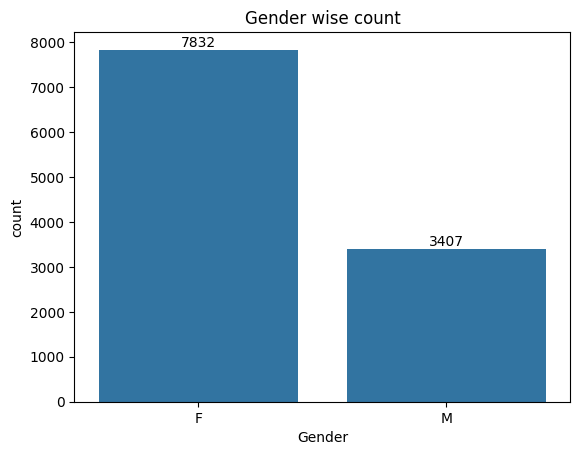

In [11]:
ax=sns.countplot(x='Gender',data=df)
plt.title("Gender wise count")
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

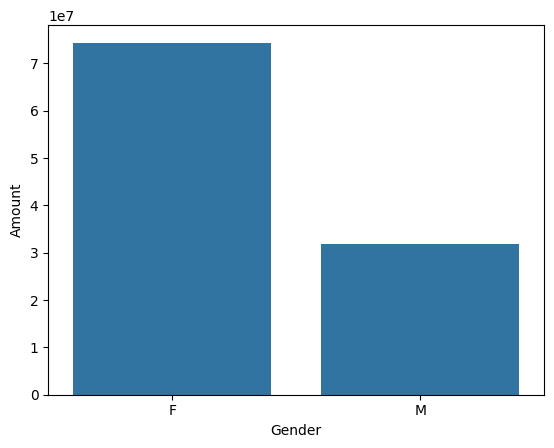

In [12]:
sales_gen=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values('Amount',ascending=False)
sns.barplot(x='Gender',y='Amount',data=sales_gen)

<Axes: xlabel='Gender', ylabel='Amount'>

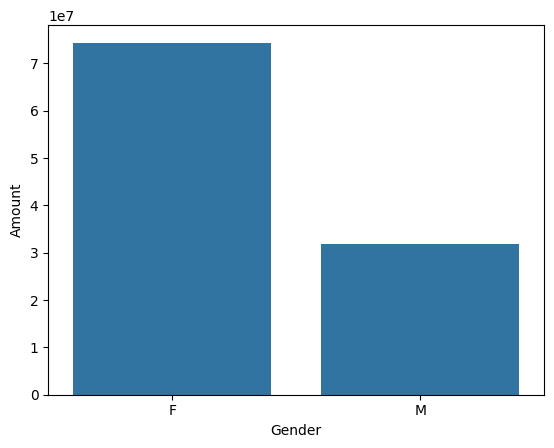

In [13]:
sales_gen=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values('Amount',ascending=False)
sns.barplot(x='Gender',y='Amount',data=sales_gen)

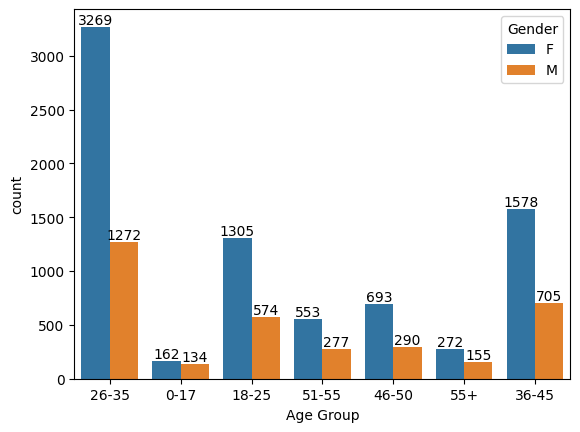

In [14]:
ax=sns.countplot(data=df,x='Age Group',hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

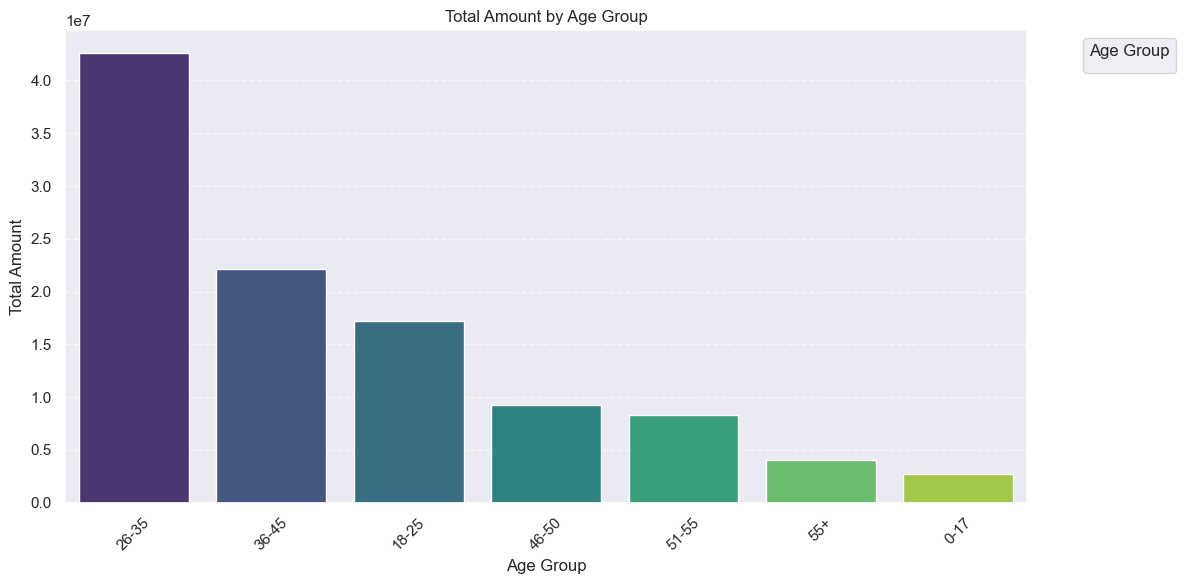

In [33]:
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize': (12, 6)})

ax = sns.barplot(x='Age Group', y='Amount', data=sales_age, hue='Age Group', palette='viridis', dodge=False)

plt.title('Total Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
plt.legend(unique_labels.values(), unique_labels.keys(), title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


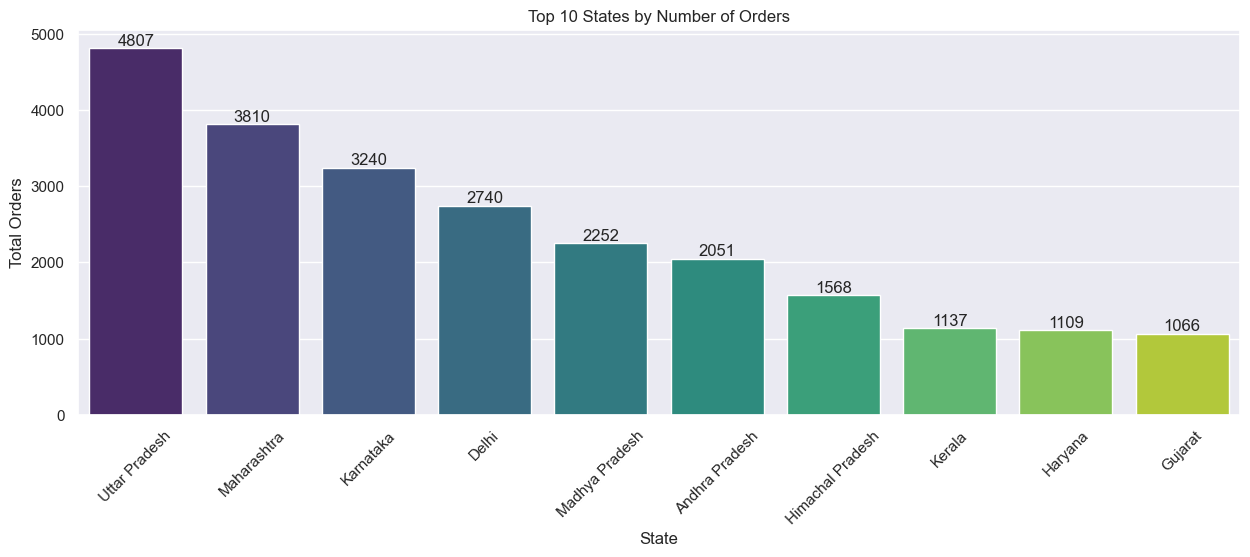

In [16]:
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize': (15, 5)})

ax = sns.barplot(data=sales_state, x='State', y='Orders', hue='State', palette='viridis', legend=False)

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Top 10 States by Number of Orders')
plt.xlabel('State')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.show()

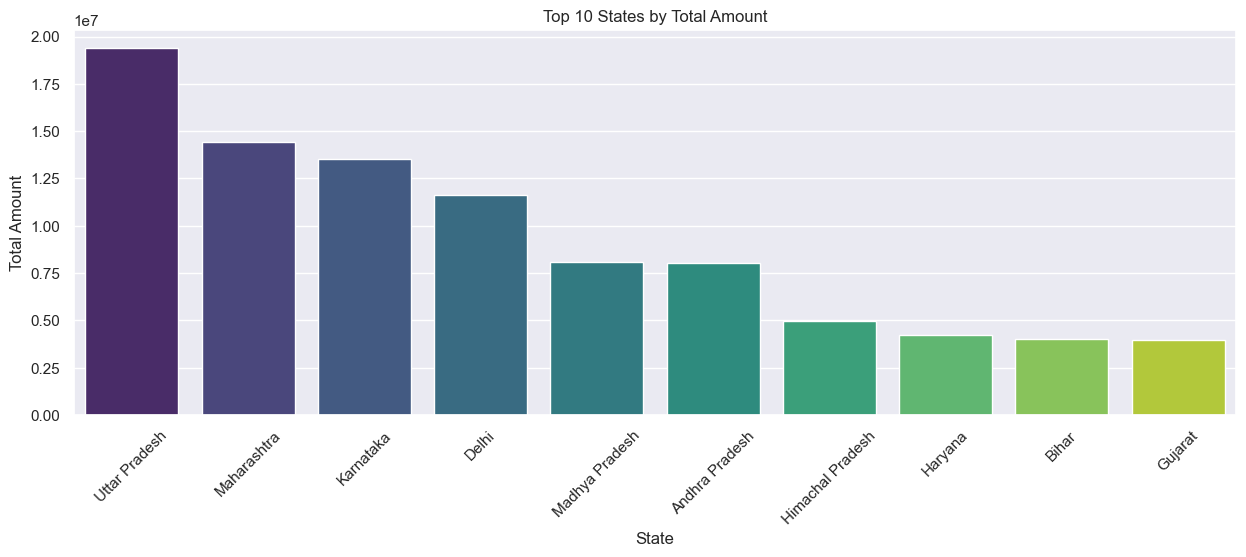

In [29]:
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize': (15, 5)})

ax = sns.barplot(data=sales_state, x='State', y='Amount', hue='State', palette='viridis', legend=False)

plt.title('Top 10 States by Total Amount')
plt.xlabel('State')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

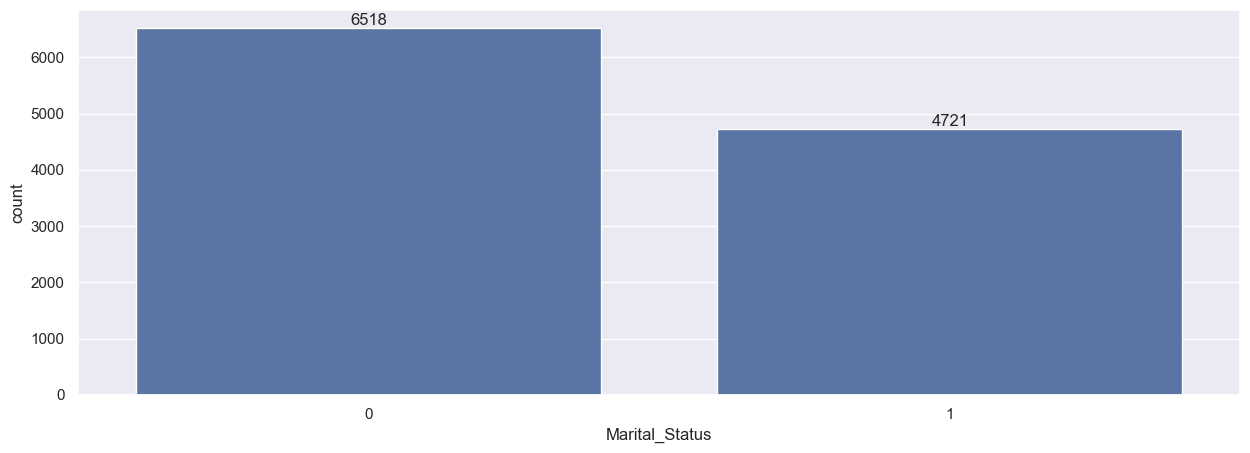

In [18]:
ax=sns.countplot(data=df,x='Marital_Status')
sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

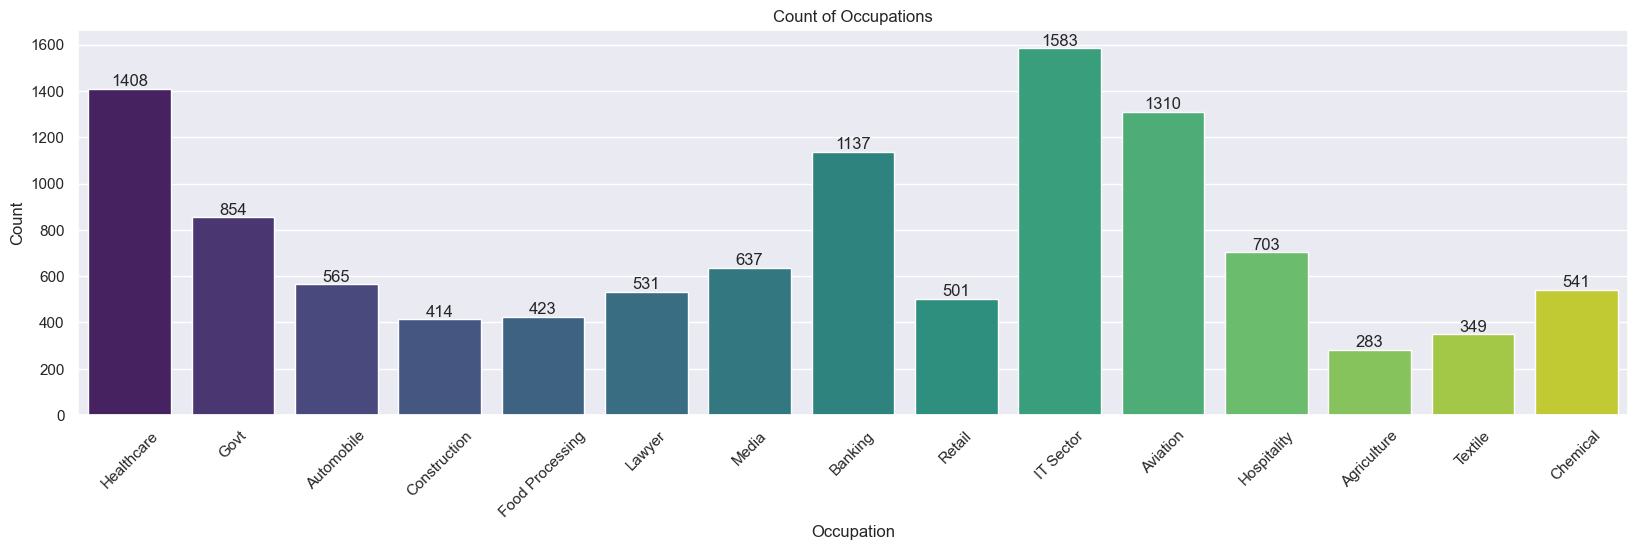

In [19]:
sns.set(rc={'figure.figsize': (20, 5)})

ax = sns.countplot(data=df, x='Occupation', hue='Occupation', palette='viridis', legend=False)

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Count of Occupations')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

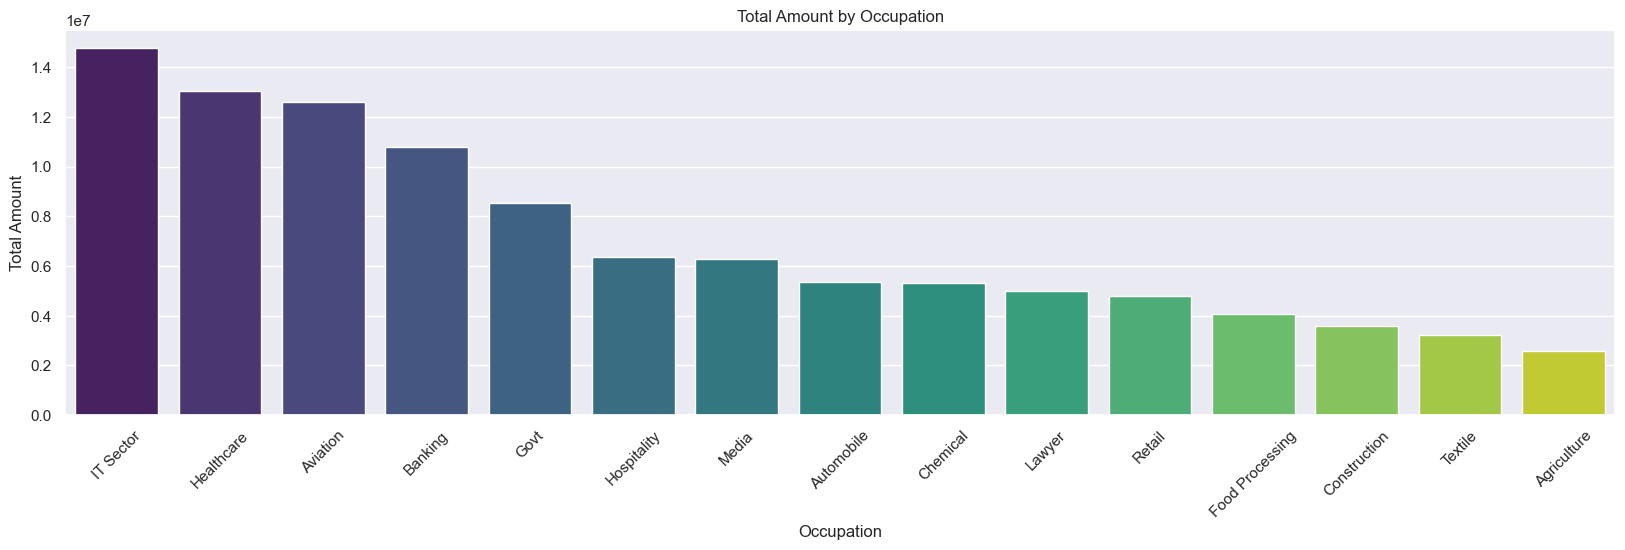

In [27]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize': (20, 5)})

ax = sns.barplot(data=sales_state, x='Occupation', y='Amount', hue='Occupation', palette='viridis', legend=False)

plt.title('Total Amount by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

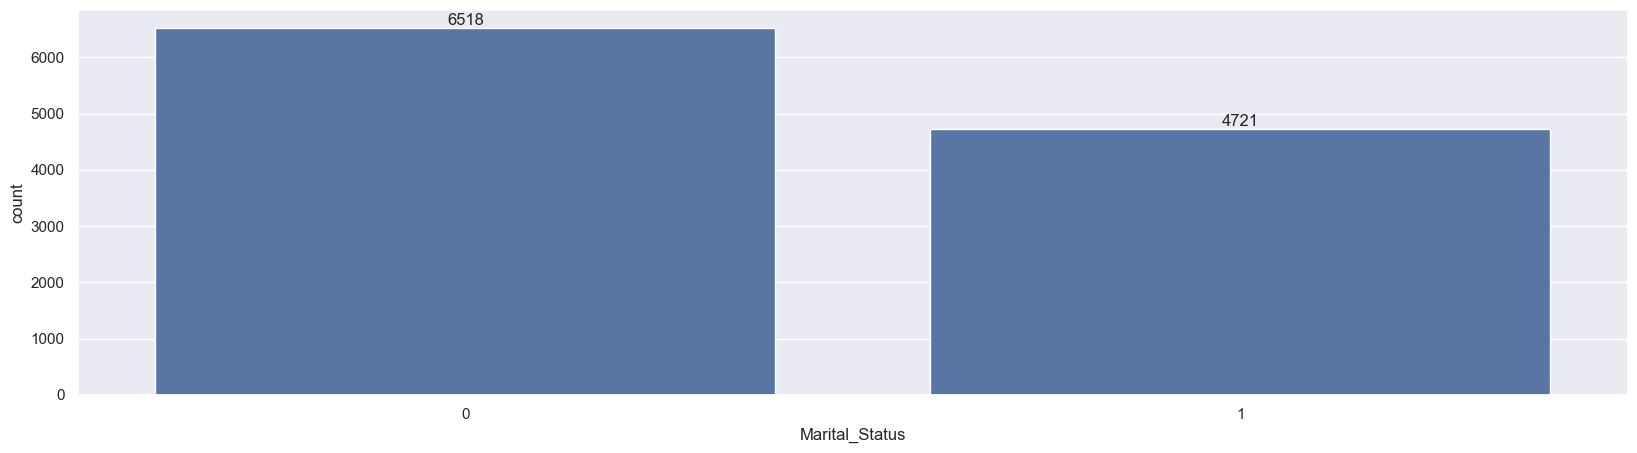

In [21]:
ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(5,3)})
for bars in ax.containers:
    ax.bar_label(bars)

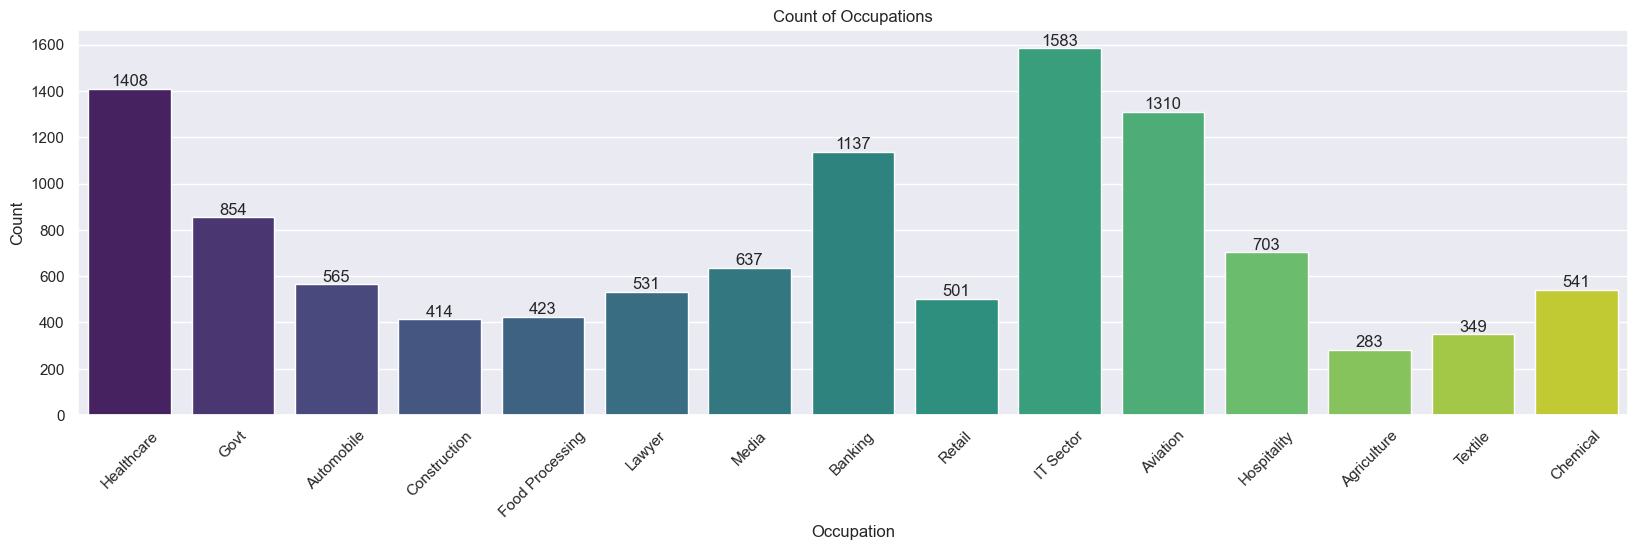

In [22]:
sns.set(rc={'figure.figsize': (20, 5)})

ax = sns.countplot(data=df, x='Occupation', hue='Occupation', palette='viridis', legend=False)

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Count of Occupations')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Marital_Status', ylabel='Amount'>

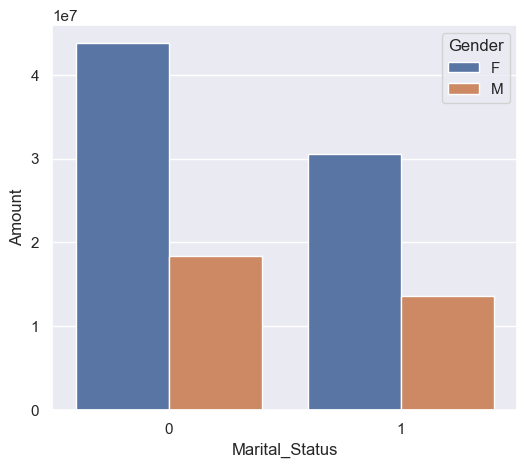

In [23]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

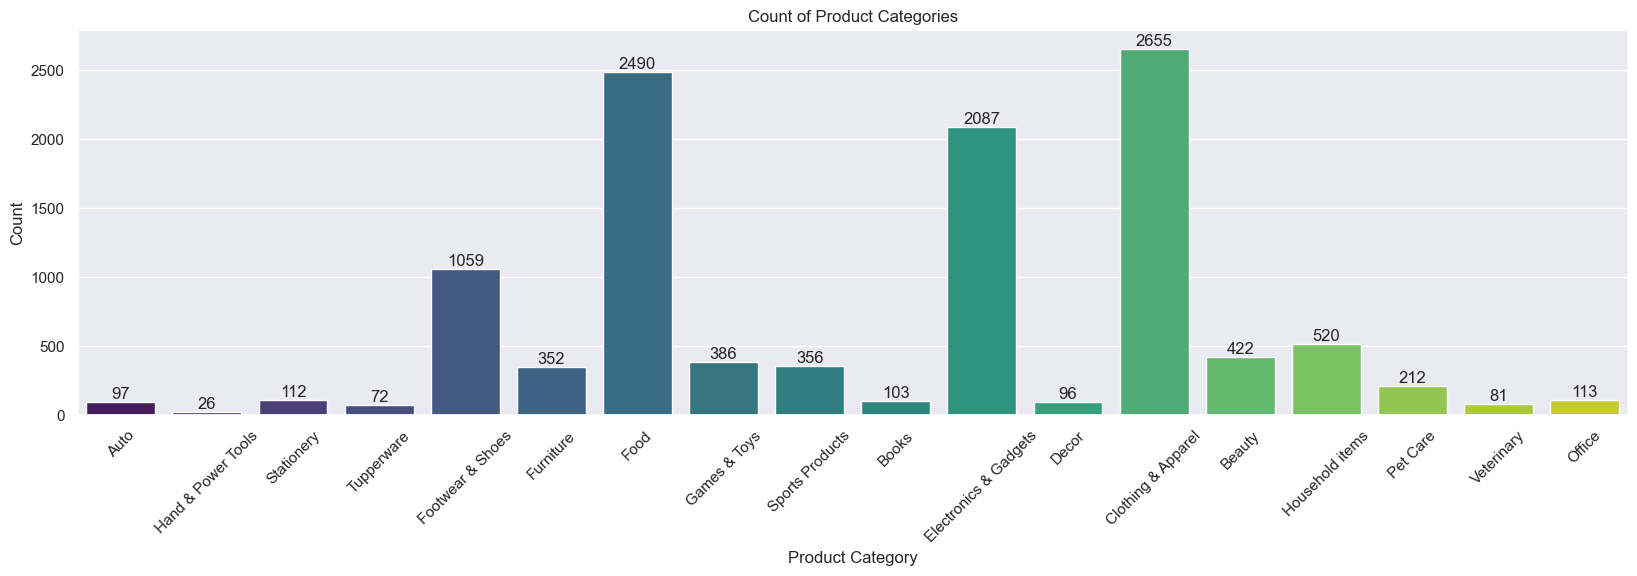

In [24]:
sns.set(rc={'figure.figsize': (20, 5)})

ax = sns.countplot(data=df, x='Product_Category', hue='Product_Category', palette='viridis', legend=False)

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Count of Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

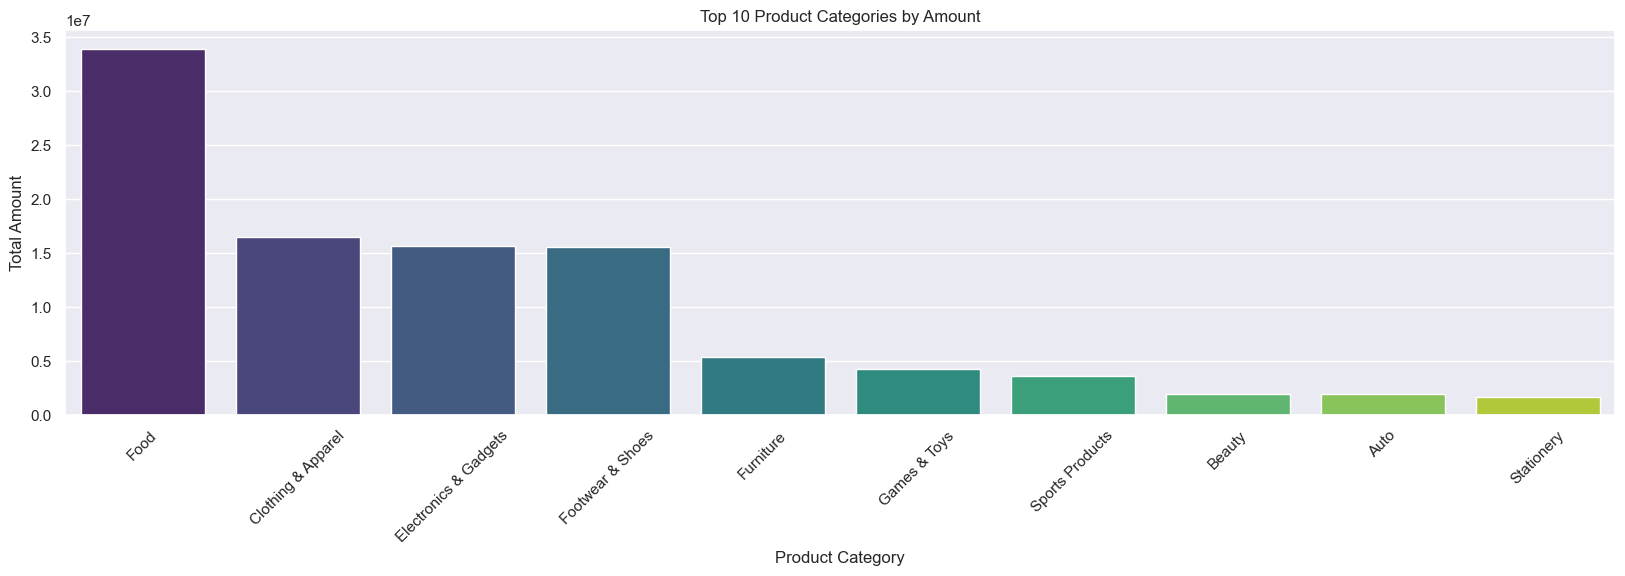

In [25]:
sales_state = df.groupby('Product_Category', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize': (20, 5)})

sns.barplot(data=sales_state, x='Product_Category', y='Amount', hue='Product_Category', palette='viridis', legend=False)

plt.title('Top 10 Product Categories by Amount')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()